In [102]:
import pandas as pd
import numpy as np

In [103]:
df=pd.read_csv('haberman.csv')

** Attribute Information:**
* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute) - 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year


In [104]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


** Observations **<br>
* age, year, nodes - Attributes(Cannot say whether they can be selected as features or not for the model as of now) <br>
* status - Target label 

In [105]:
df.shape

(306, 4)

* Total records: 306

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


* Total Null values-0 <br>
* All are of type int - *No conversions required* 

In [107]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


** From mean and quartiles**<br>
* age - we can say that most of the samples lies in the first half, as the mean is little nearer to the min value<br>
* year - Looks fine<br>
* nodes - min and mean are nearer where as max is too far, which says that there may be few outliers <br>
<br>

** From std and percentiles**<br>
* age - population is fairly distributed<br>
* year - has least std which means more number of samples are around the mean.<br>
* nodes - Tells that there are outlier of about roughly 25% of population. ** <br>

*status- evenly distributed*: <br>
<br>
**NOTE: All these inferences are not final. **

In [108]:
df.groupby('status')['status'].count()
#df['status'].value_counts() --> Gets the same result

status
1    225
2     81
Name: status, dtype: int64

* The class is imbalanced as 75%(approx.) of population is 1 and 25%(approx.) is about 2 

** Objective:<br>
To check whether the given the patient survived 5 years or longer<br>
 (or)<br>
the patient died within 5 years.<br> **

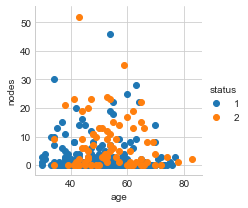

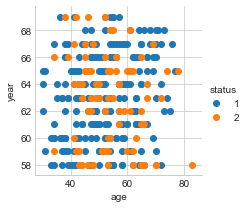

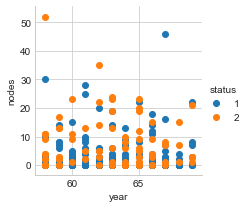

In [109]:
#Scatter plots
import matplotlib.pyplot as plt
import seaborn as sns
plt.close()
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="status", size=3).map(plt.scatter,"age", "nodes").add_legend()
plt.show()

sns.set_style("whitegrid")
sns.FacetGrid(df, hue="status", size=3).map(plt.scatter,"age", "year").add_legend()
plt.show()

sns.set_style("whitegrid")
sns.FacetGrid(df, hue="status", size=3).map(plt.scatter,"year", "nodes").add_legend()
plt.show()

* All the features are mostly overlapped with other features. Hard to interpret due to overlapping 

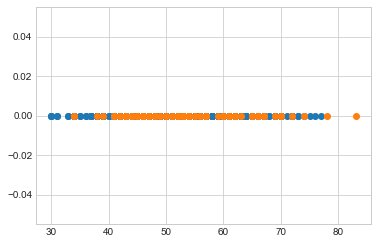

In [110]:
df_survived=df.loc[df["status"]==1]
df_not_survived=df.loc[df["status"]==2]

plt.plot(df_survived['age'], np.zeros_like(df_survived['age']), 'o')
plt.plot(df_not_survived['age'], np.zeros_like(df_not_survived['age']), 'o')
plt.show()

* People of age (40-60) are mostly survived but this can't be guaranteed, as the orange plots may dominate blue plots under it.

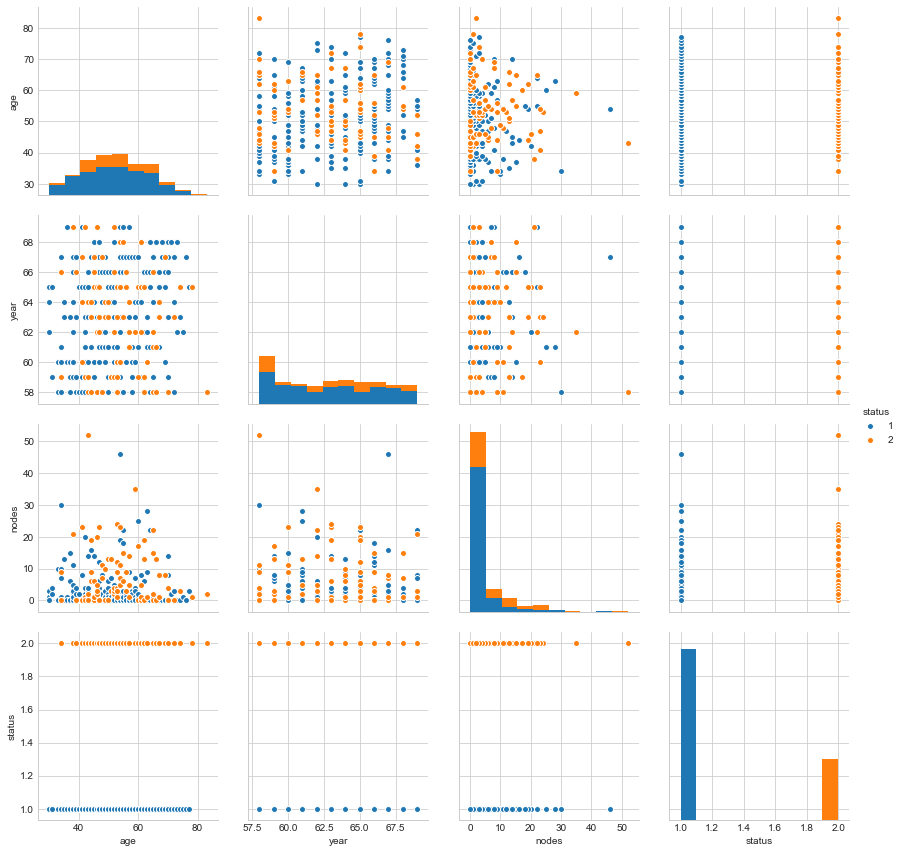

In [111]:
#PairPlot
sns.set_style("whitegrid")
sns.pairplot(df, hue="status", size=3)
plt.show()

* Due to these overlappings, we can't conclude anything. So, let's try to infer from pdfs or cdfs.

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


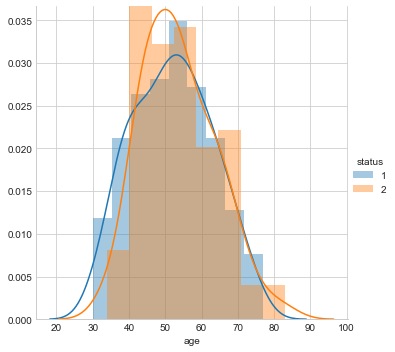

In [112]:
sns.FacetGrid(df, hue="status", size=5).map(sns.distplot,"age").add_legend()
plt.show()

* The two curves are almost overlapped<br>
**Inferences:<br>**
* For a sample in the given population, we can say that:<br>
if age<=35<br>
    survives>5 years<br>
else if age>=75 <br>
    dies within 5 years     
else<br> 
    Difficult to interpret.

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


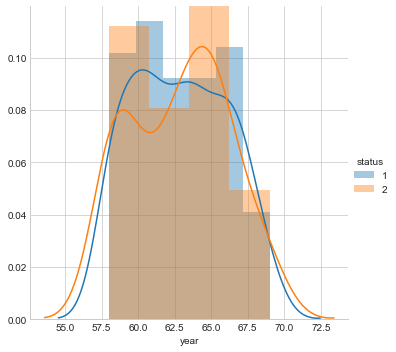

In [113]:
sns.FacetGrid(df, hue="status", size=5).map(sns.distplot, "year").add_legend()
plt.show()

* Difficult to interpret these curves as they completely overlap

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


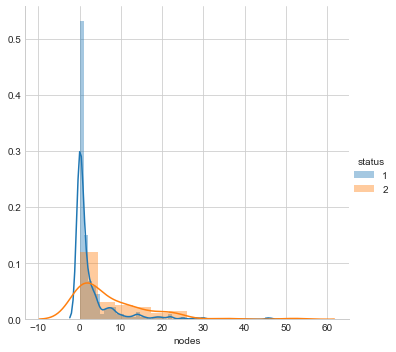

In [114]:
sns.FacetGrid(df, hue="status", size=5).map(sns.distplot, "nodes").add_legend()
plt.show()

* From this curve <br>
if nodes==0:<br>
    patient survives>5 years<br>
else<br>
    may or maynot survive more than 5 years

[0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.00755858 0.02519526 0.04031242 0.04031242 0.02771479 0.02519526
 0.02015621 0.01007811 0.00503905 0.00251953]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


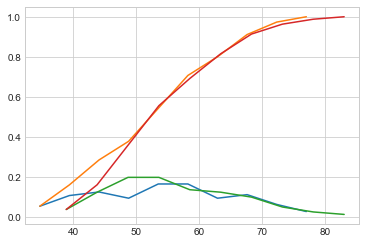

In [115]:
plt.close()
counts, bin_edges = np.histogram(df_survived['age'], bins=10,density = True)
print(counts)
print(bin_edges)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(df_not_survived['age'], bins=10,density = True)
print(counts)
print(bin_edges)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

* Not much additional information is seen.<br>
* if age<=35(approx)<br>
    survives more than 5 years<br>
else<br>
    may or may not survive more than 5 years<br>

[0.16969697 0.0969697  0.09292929 0.06464646 0.08888889 0.09292929
 0.06060606 0.08888889 0.08484848 0.06868687]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.23569024 0.04489338 0.03367003 0.07856341 0.08978676 0.08978676
 0.14590348 0.06734007 0.04489338 0.07856341]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


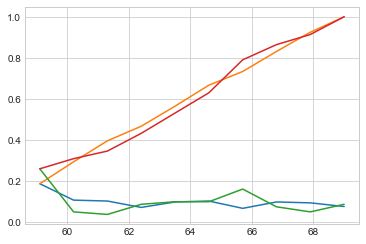

In [116]:
plt.close()
counts, bin_edges = np.histogram(df_survived['year'], bins=10,density = True)
print(counts)
print(bin_edges)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(df_not_survived['year'], bins=10,density = True)
print(counts)
print(bin_edges)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)

plt.show()

* These curves almost follow the same path.

[0.18164251 0.0173913  0.00483092 0.0057971  0.00386473 0.00096618
 0.00193237 0.         0.         0.00096618]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.10921178 0.02849003 0.02611586 0.00949668 0.01424501 0.
 0.00237417 0.         0.         0.00237417]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


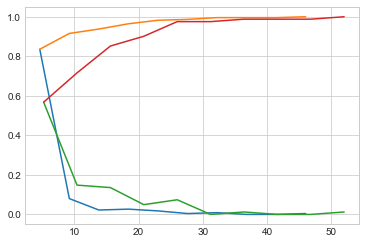

In [117]:
plt.close()
counts, bin_edges = np.histogram(df_survived['nodes'], bins=10,density = True)
print(counts)
print(bin_edges)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(df_not_survived['nodes'], bins=10,density = True)
print(counts)
print(bin_edges)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)

plt.show()

* We can see that most of the deaths and survivals are around '2' nodes(80% survival cases and 60% death cases).

In [118]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(df_survived["age"]))
print(np.median(df_not_survived["age"]))

print(np.median(df_survived["year"]))
print(np.median(df_not_survived["year"]))

print(np.median(df_survived["nodes"]))
print(np.median(df_not_survived["nodes"]))

print("\nQuantiles:")
print(np.percentile(df_survived["age"],np.arange(0, 100, 25)))
print(np.percentile(df_not_survived["age"],np.arange(0, 100, 25)))

print(np.percentile(df_survived["year"],np.arange(0, 100, 25)))
print(np.percentile(df_not_survived["year"],np.arange(0, 100, 25)))

print(np.percentile(df_survived["nodes"],np.arange(0, 100, 25)))
print(np.percentile(df_not_survived["nodes"],np.arange(0, 100, 25)))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(df_survived["age"]))
print(robust.mad(df_not_survived["age"]))

print(robust.mad(df_survived["year"]))
print(robust.mad(df_not_survived["year"]))

print(robust.mad(df_survived["nodes"]))
print(robust.mad(df_not_survived["nodes"]))


Medians:
52.0
53.0
63.0
63.0
0.0
4.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]
[58. 60. 63. 66.]
[58. 59. 63. 65.]
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

Median Absolute Deviation
13.343419966550417
11.860817748044816
4.447806655516806
4.447806655516806
0.0
5.930408874022408


* From the above data, almost all the values of 'survived and not survive patients' are same, **except the nodes of survived patients are 0 mostly(From the MAD of survived-last but one value).**

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


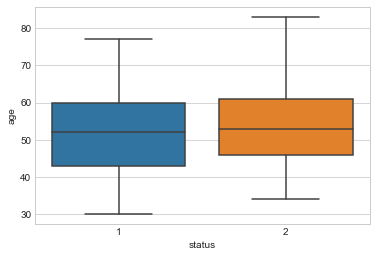

In [119]:
sns.boxplot(x='status',y='age', data=df)
plt.show()

* Most of the patients were diagnosied with cancer are in the age 40-60

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


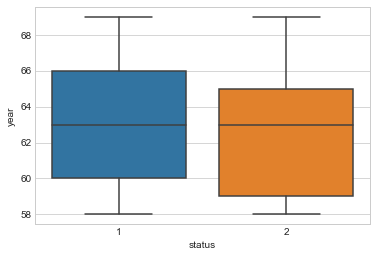

In [120]:
sns.boxplot(x='status',y='year', data=df)
plt.show()

* Most of the operations took in the years 59-66.

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


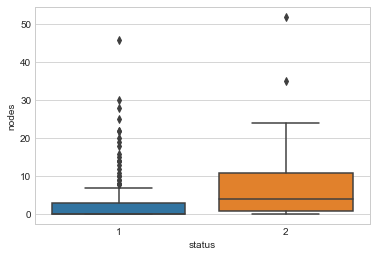

In [121]:
sns.boxplot(x='status',y='nodes', data=df)
plt.show()

* Patients with nodes > 10(approx.) survived more than 5 years.
* Patient with nodes 2-10 are mostly dead with in 5 years

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


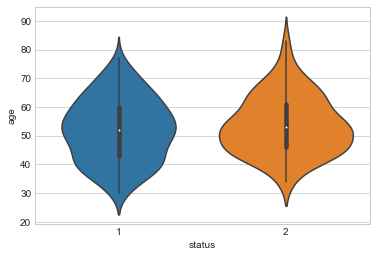

In [122]:
sns.violinplot(x="status", y="age", data=df, size=5)
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


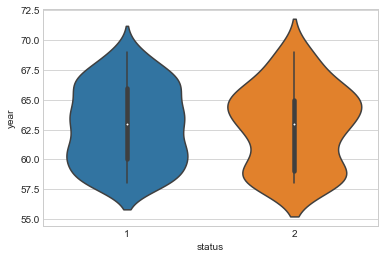

In [123]:
sns.violinplot(x="status", y="year", data=df, size=5)
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


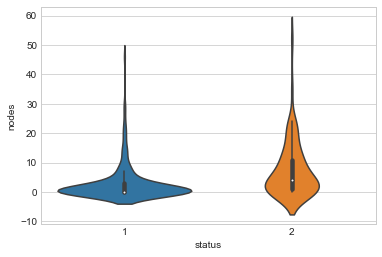

In [124]:
sns.violinplot(x="status", y="nodes", data=df, size=5)
plt.show()

These violin plots gives the same information that the box plot has given to us.

** Final Note:**<br>
* From the above observation, age and nodes should be definitely selected as *features* for the model.<br>
* Logically, year of operation doesn't contribute anything to cancer. <br>
* But in certain range of years(59-66), many operations took place which have both survivals and dead.<br>
* May be in an imaginative way, the doctors at those years might be capable of doing the successful operations(Assumption).<br>
* So, I will consider the year as a Feature too and will check the training and testing accuracy including and excluding it.<br>